# Correlation in codes

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#Setting seed for reproducibilit
np.random.seed(234)

In [2]:
#Creating a synthetic dataset

students = 40
study_hours = np.random.randint(1, 10, students) #1 to 9 hours of study
job_hours = np.random.randint(0, 15, students) #students indicates the size of the randomly generated integers between 0 and 15
sleep_hours = np.random.randint(4,9, students)
extracurricular = np.random.randint(0, 6, students)

# Exam score: positively influenced by study & sleep, negatively by job & extra activities
exam_score = (40
              + 5*study_hours #strong positive
              + 2*sleep_hours
              - 3*job_hours # strong negative
              - 1*extracurricular #mild negative
              + np.random.randint(-5, 5, students)) #noise

data = pd.DataFrame({
    'Study_Hours': study_hours,
    'Job_Hours': job_hours,
    "Sleep_Hours": sleep_hours,
    'Extracurricular_Hours': extracurricular,
    'Exam_Score': exam_score
})

In [3]:
data.head()

,Study_Hours,Job_Hours,Sleep_Hours,Extracurricular_Hours,Exam_Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [4]:
#Computing correlation for each data feature

corr_coefficients = data.corr()
corr_coefficients

,Study_Hours,Job_Hours,Sleep_Hours,Extracurricular_Hours,Exam_Score
Study_Hours,1.000000,-0.136551,-0.006383,-0.114442,0.694048
Job_Hours,-0.136551,1.000000,0.188992,0.209991,-0.782525
Sleep_Hours,-0.006383,0.188992,1.000000,0.158029,-0.035653
Extracurricular_Hours,-0.114442,0.209991,0.158029,1.000000,-0.276837
Exam_Score,0.694048,-0.782525,-0.035653,-0.276837,1.000000


In [5]:
data.columns

Index(['Study_Hours', 'Job_Hours', 'Sleep_Hours', 'Extracurricular_Hours',
       'Exam_Score'],
      dtype='object')

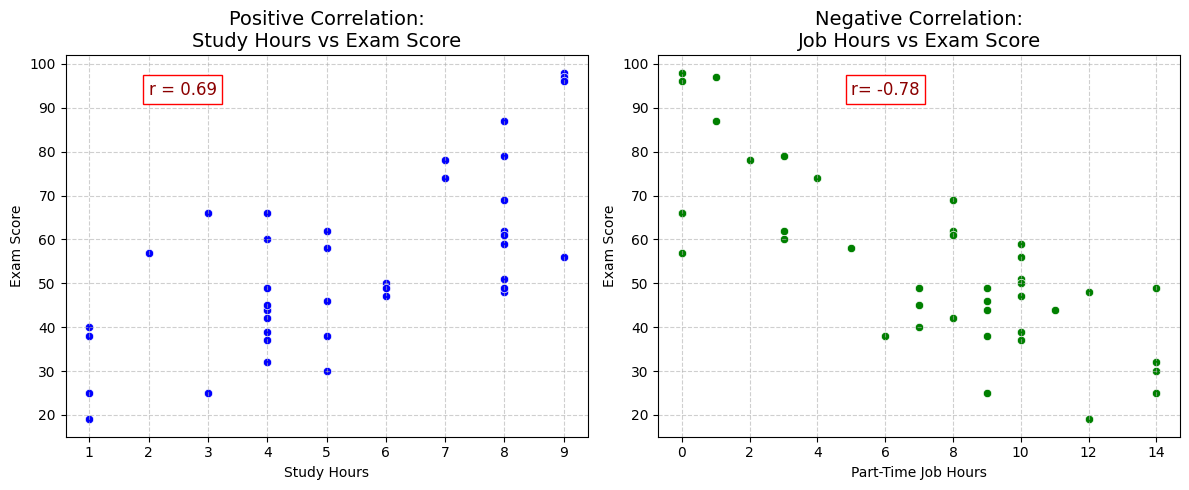

In [39]:
#Plotting the relationship on a scatter plot

#Plot: Positive and Negative examples
plt.figure(figsize=(12,5))

#Positive correlation: Study vs Score
plt.subplot(1,2,1)
sns.scatterplot(x='Study_Hours', y= 'Exam_Score', data=data, color='blue')
plt.title("Positive Correlation:\nStudy Hours vs Exam Score", fontsize=14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data['Exam_Score'])-5, f"r = {data.corr().loc['Study_Hours', 'Exam_Score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6) #Alpha adjust the opacity of the gridlines
plt.tight_layout()

#Negative correlation: Job vs Score
plt.subplot(1,2,2)
sns.scatterplot(x='Job_Hours', y='Exam_Score', data=data, color='green')
plt.title("Negative Correlation:\nJob Hours vs Exam Score", fontsize=14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")

#AddS the specified text to position x,y in data coordinates, in this case; 5, max(data['Exam_Score'])-5
plt.text(5, max(data['Exam_Score'])-5, f"r= {data.corr().loc['Job_Hours', 'Exam_Score']:.2f}",
                fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()

**Interpretation**<br><br>
**Study hours vs Exam score**<br>
There exists a strong positive correlation between the amount of study hours and exam score. That is exam score experiences an increase with increase in study hours, this does not necessarily mean that an increase in study hours automatically increases exam scores.
<br><br>

**Job hours vs exam score**<br>
There exists a strong negative correlation between the amount of job hours and exam score. That is as job hours increases there is a corresponding and significant decrease in exam score.
